              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1042
           1       1.00      0.78      0.87       866

    accuracy                           0.90      1908
   macro avg       0.92      0.89      0.89      1908
weighted avg       0.91      0.90      0.89      1908

Model Accuracy: 89.68 %


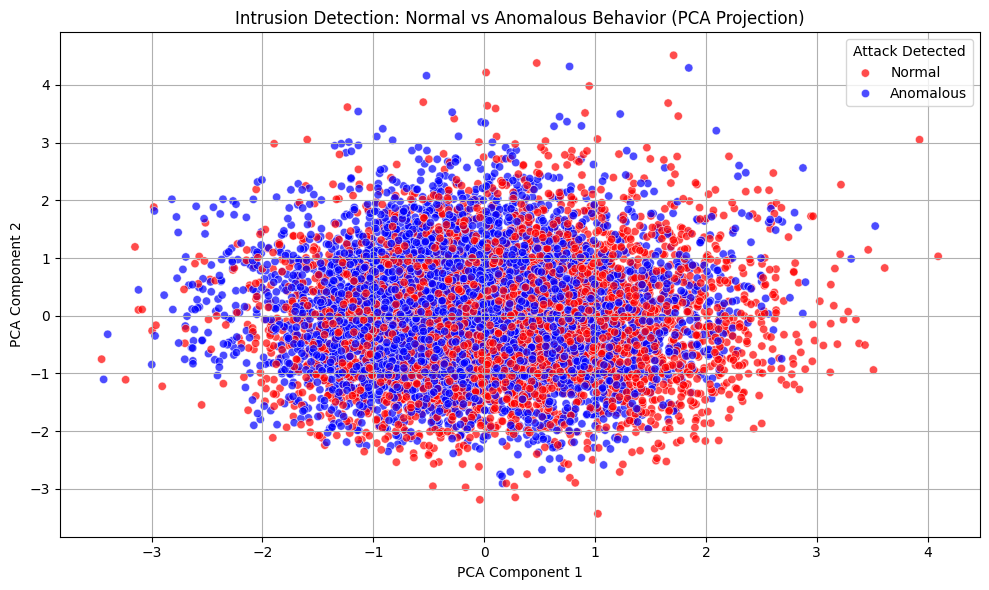

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# Step 1: Load the dataset
df = pd.read_csv("/cybersecurity_intrusion_data.csv")  # Adjust path if needed

# Step 2: Preprocessing
df.drop(columns=['session_id'], inplace=True)  # Not useful for modeling

# Encode categorical features
categorical_cols = ['protocol_type', 'browser_type', 'unusual_time_access', 'encryption_used']
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))

# Step 3: Split Features and Labels
X = df.drop(columns=['attack_detected'])
y = df['attack_detected']

# Step 4: Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Dimensionality Reduction for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 6: Train a classifier
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Evaluation
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
# Add this line for accuracy:
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", round(accuracy * 100, 2), "%")




# Step 7: Visualization
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
pca_df['attack_detected'] = y.values

plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='attack_detected', palette={0: 'blue', 1: 'red'}, alpha=0.7)
plt.title("Intrusion Detection: Normal vs Anomalous Behavior (PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Attack Detected', labels=['Normal', 'Anomalous'])
plt.grid(True)
plt.tight_layout()
plt.show()
